In [31]:
import pandas as pd
from pycaret.classification import *
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 

df = pd.read_csv("final.csv")

cols_to_keep = ['jacket_number', 'age_at_arrest', 'hours', 'marital_status', 'employment_status',
    'city', 'race', 'sex', 'STATE', 'citizenship', 'occupation', 'school', 'prisoner_type', 'r', 'days_since', 'offense_level', 'previous_i', 'age_first', 'year']
categorical =  ['marital_status', 'employment_status', 'race', 'city', 'sex', 'STATE', 'citizenship', 'occupation', 'school', 'prisoner_type', 'offense_level', 'year']

predict_columns = ['age_at_arrest', 'age_at_release', 'hours', 'marital_status', 'employment_status',
    'city', 'race', 'sex', 'STATE', 'citizenship', 'occupation', 'school', 'prisoner_type']

new_df = df.loc[:, cols_to_keep]
new_df


,jacket_number,age_at_arrest,hours,marital_status,employment_status,city,race,sex,STATE,citizenship,occupation,school,prisoner_type,r,days_since,offense_level,previous_i,age_first,year
0,6265,72.0,14,Single,Retired,CHAMPAIGN,Black,Male,ILLINOIS,UNITED STATES,UNEMPLOYED,High School,Misdemeanor Arraignment,False,NaN,Misdemeanor,0,72.0,2013
1,6565,68.0,40,Single,Self Employed,SAVOY,Black,Male,ILLINOIS,UNITED STATES,SELF EMPLOYED,High School,Misdemeanor Arraignment,True,NaN,Misdemeanor,0,68.0,2012
2,6565,69.0,11,Single,Retired,SAVOY,Black,Male,ILLINOIS,UNITED STATES,SELF EMPLOYED,High School,OV Pre-Trial,True,521.0,Other,1,68.0,2013
3,6565,70.0,16,Single,Unemployed,SAVOY,Black,Male,ILLINOIS,UNITED STATES,SELF EMPLOYED,High School,OV Pre-Trial,True,316.0,Other,2,68.0,2014
4,6565,71.0,3,Single,Employed - Full Time,SAVOY,Black,Male,ILLINOIS,UNITED STATES,SELF EMPLOYED,High School,OV Pre-Trial,True,209.0,Other,3,68.0,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40252,1069761,54.0,0,Divorced,Unemployed,DANVILLE,Black,Male,ILLINOIS,UNITED STATES,SALES,High School,Felony Other,False,NaN,Felony,0,54.0,2018
40253,1069763,18.0,0,Single,Unemployed,RANTOUL,Black,Female,ILLINOIS,UNITED STATES,FACTORY WORKER,High School,Misdemeanor Other,False,NaN,Misdemeanor,0,18.0,2018
40254,1069766,32.0,115,Married,Employed - Full Time,RANTOUL,Black,Female,ILLINOIS,UNITED STATES,FACTORY WORKER,High School,Misdemeanor Arraignment,False,NaN,Misdemeanor,0,32.0,2018
40255,1069768,31.0,9,Married,Employed - Full Time,CHICAGO,Black,Male,ILLINOIS,BRAZIL,STUDENT,High School,Misdemeanor Pre-Trial,False,NaN,Misdemeanor,0,31.0,2018


In [32]:
s = setup(new_df, target='r', categorical_features=categorical)

,Description,Value
0,Session id,3043
1,Target,r
2,Target type,Binary
3,Original data shape,"(40257, 19)"
4,Transformed data shape,"(40257, 44)"
5,Transformed train set shape,"(28179, 44)"
6,Transformed test set shape,"(12078, 44)"
7,Numeric features,6
8,Categorical features,12
9,Rows with missing values,48.7%


In [33]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.7204,0.0000,0.7342,0.7246,0.7293,0.4403,0.4404,0.6030
gbc,Gradient Boosting Classifier,0.7144,0.0000,0.7422,0.7129,0.7272,0.4279,0.4283,0.3740
rf,Random Forest Classifier,0.7042,0.0000,0.7180,0.7092,0.7135,0.4079,0.4080,0.2790
ada,Ada Boost Classifier,0.7026,0.0000,0.7350,0.7001,0.7171,0.4040,0.4045,0.1290
ridge,Ridge Classifier,0.6920,0.0000,0.7467,0.6827,0.7132,0.3821,0.3839,0.0490
lda,Linear Discriminant Analysis,0.6918,0.0000,0.7466,0.6825,0.7131,0.3817,0.3835,0.0500
et,Extra Trees Classifier,0.6810,0.0000,0.6986,0.6856,0.6919,0.3612,0.3613,0.2720
lr,Logistic Regression,0.6755,0.0000,0.7278,0.6689,0.6970,0.3491,0.3507,0.3570
qda,Quadratic Discriminant Analysis,0.6308,0.0000,0.7534,0.6271,0.6410,0.2576,0.2820,0.0480
dt,Decision Tree Classifier,0.6272,0.0000,0.6379,0.6363,0.6371,0.2539,0.2539,0.0620


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=3043, reg_alpha=0.0, reg_lambda=0.0, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)

In [34]:
gbc = create_model('gbc')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7051,0.0000,0.7455,0.6995,0.7218,0.4088,0.4097
1,0.7158,0.0000,0.7420,0.7149,0.7282,0.4305,0.4309
2,0.7172,0.0000,0.7441,0.7159,0.7297,0.4334,0.4337
3,0.7250,0.0000,0.7607,0.7194,0.7395,0.4487,0.4495
4,0.7083,0.0000,0.7275,0.7108,0.7191,0.4158,0.4160
5,0.7115,0.0000,0.7426,0.7087,0.7252,0.4219,0.4224
6,0.7090,0.0000,0.7260,0.7122,0.7190,0.4174,0.4174
7,0.7133,0.0000,0.7363,0.7136,0.7248,0.4257,0.4259
8,0.7083,0.0000,0.7391,0.7059,0.7221,0.4155,0.4160


In [35]:
tuned_gbc = tune_model(gbc)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7097,0.0000,0.7379,0.7085,0.7229,0.4184,0.4188
1,0.7165,0.0000,0.7344,0.7190,0.7267,0.4322,0.4323
2,0.7161,0.0000,0.7351,0.7182,0.7266,0.4315,0.4316
3,0.7317,0.0000,0.7538,0.7315,0.7425,0.4626,0.4629
4,0.7168,0.0000,0.7275,0.7225,0.7250,0.4331,0.4332
5,0.7154,0.0000,0.7474,0.7119,0.7292,0.4297,0.4302
6,0.7182,0.0000,0.7294,0.7234,0.7264,0.4360,0.4360
7,0.7161,0.0000,0.7405,0.7157,0.7279,0.4313,0.4316
8,0.7009,0.0000,0.7294,0.6999,0.7143,0.4006,0.4010


Fitting 10 folds for each of 10 candidates, totalling 100 fits


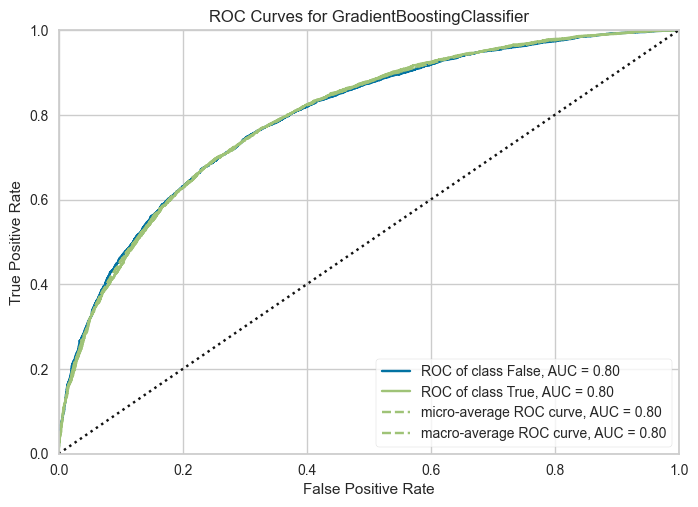

In [36]:
plot_model(tuned_gbc, plot = 'auc')

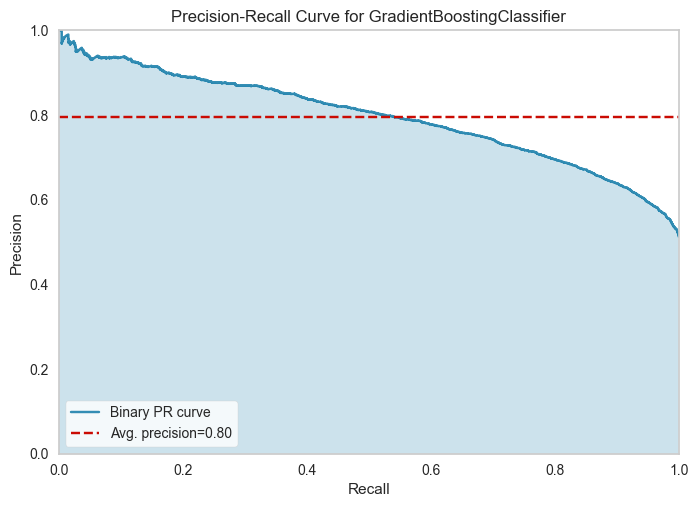

In [37]:
plot_model(tuned_gbc, plot = 'pr')

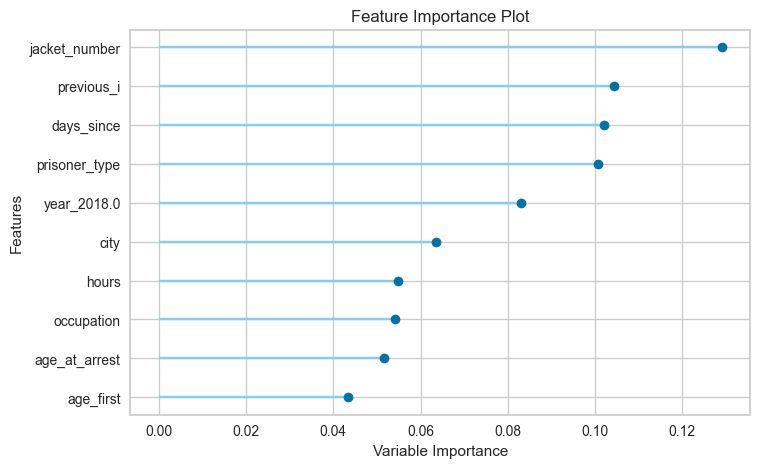

In [38]:
plot_model(tuned_gbc, plot='feature')

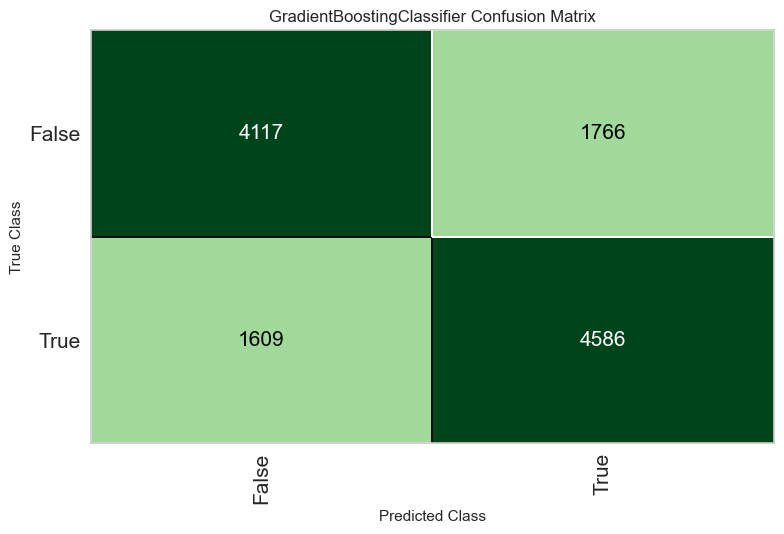

In [39]:
plot_model(tuned_gbc, plot = 'confusion_matrix')

In [40]:
final_gbc = finalize_model(tuned_gbc)
print(final_gbc)

Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['jacket_number', 'age_at_arrest',
                                             'hours', 'days_since',
                                             'previous_i', 'age_first'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_features=False,
                                                              missing_values=nan,
                                                              strategy='mean'))),
                ('categorical_imputer',
                 Trans...
                                            criterion='friedman_mse', init=None,
                  

In [41]:
predict_model(final_gbc)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.7437,0.8218,0.7651,0.7429,0.7539,0.4867,0.4870


,jacket_number,age_at_arrest,hours,marital_status,employment_status,city,race,sex,STATE,citizenship,...,school,prisoner_type,days_since,offense_level,previous_i,age_first,year,r,prediction_label,prediction_score
22247,1016999,23.0,0,Single,Unemployed,CHAMPAIGN,Black,Male,ILLINOIS,UNITED STATES,...,High School,Civil Other,879.0,Other,4,20.0,2016,True,1,0.7210
5303,52600,34.0,1,Seperated,Employed - Full Time,MAHOMET,Black,Male,ILLINOIS,UNITED STATES,...,High School,Civil Other,NaN,Other,0,34.0,2012,True,1,0.6819
15541,974227,25.0,3,Single,Employed - Part Time,CHAMPAIGN,Black,Male,ILLINOIS,UNITED STATES,...,High School,Felony Arraignment,818.0,Felony,2,23.0,2015,True,1,0.7699
8036,63994,33.0,47,Single,Employed - Part Time,MAHOMET,Black,Male,ILLINOIS,UNITED STATES,...,High School,Felony Pre-Trial,16.0,Felony,5,28.0,2017,True,1,0.7358
36380,1061269,34.0,5,Divorced,Unemployed,CHAMPAIGN,Black,Male,ILLINOIS,UNITED STATES,...,High School,Hold Other,NaN,Other,0,34.0,2016,False,0,0.7688
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3185,42631,53.0,35,Single,Unemployed,DANVILLE,Black,Female,ILLINOIS,UNITED STATES,...,High School,Felony Pre-Trial,494.0,Felony,2,51.0,2016,False,1,0.5995
26511,1031602,19.0,1,Significant Other,Employed - Full Time,SPRINGFIELD,Black,Female,ILLINOIS,UNITED STATES,...,High School,Misdemeanor Arraignment,NaN,Misdemeanor,0,19.0,2012,False,0,0.6431
29606,1040734,17.0,13,Single,Unemployed,CHAMPAIGN,Black,Male,ILLINOIS,UNITED STATES,...,High School,Felony Arraignment,NaN,Felony,0,17.0,2013,True,1,0.8274
12941,779322,27.0,1,Single,Employed - Full Time,DECATUR,Black,Male,ILLINOIS,UNITED STATES,...,High School,Misdemeanor Arraignment,231.0,Misdemeanor,1,27.0,2013,True,1,0.7269


In [42]:
save_model(gbc, model_name='gbc-model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['jacket_number', 'age_at_arrest',
                                              'hours', 'days_since',
                                              'previous_i', 'age_first'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean'))),
                 ('categorical_imputer',
                  Trans...
                                             criterion='friedman_mse', init=None,
   

In [43]:
unseen_predictions = predict_model(final_gbc)
unseen_predictions.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.7437,0.8218,0.7651,0.7429,0.7539,0.4867,0.4870


,jacket_number,age_at_arrest,hours,marital_status,employment_status,city,race,sex,STATE,citizenship,...,school,prisoner_type,days_since,offense_level,previous_i,age_first,year,r,prediction_label,prediction_score
22247,1016999,23.0,0,Single,Unemployed,CHAMPAIGN,Black,Male,ILLINOIS,UNITED STATES,...,High School,Civil Other,879.0,Other,4,20.0,2016,True,1,0.7210
5303,52600,34.0,1,Seperated,Employed - Full Time,MAHOMET,Black,Male,ILLINOIS,UNITED STATES,...,High School,Civil Other,NaN,Other,0,34.0,2012,True,1,0.6819
15541,974227,25.0,3,Single,Employed - Part Time,CHAMPAIGN,Black,Male,ILLINOIS,UNITED STATES,...,High School,Felony Arraignment,818.0,Felony,2,23.0,2015,True,1,0.7699
8036,63994,33.0,47,Single,Employed - Part Time,MAHOMET,Black,Male,ILLINOIS,UNITED STATES,...,High School,Felony Pre-Trial,16.0,Felony,5,28.0,2017,True,1,0.7358
36380,1061269,34.0,5,Divorced,Unemployed,CHAMPAIGN,Black,Male,ILLINOIS,UNITED STATES,...,High School,Hold Other,NaN,Other,0,34.0,2016,False,0,0.7688


In [44]:
unseen_predictions['prediction'] = unseen_predictions['prediction_label'].map({0: False, 1: True})

# Compare similarity between 'r' and 'prediction_mapped'
similarity = (unseen_predictions['r'] == unseen_predictions['prediction']).mean()

print("Similarity between 'r' and 'prediction_mapped':", similarity)

Similarity between 'r' and 'prediction_mapped': 0.7437489650604405


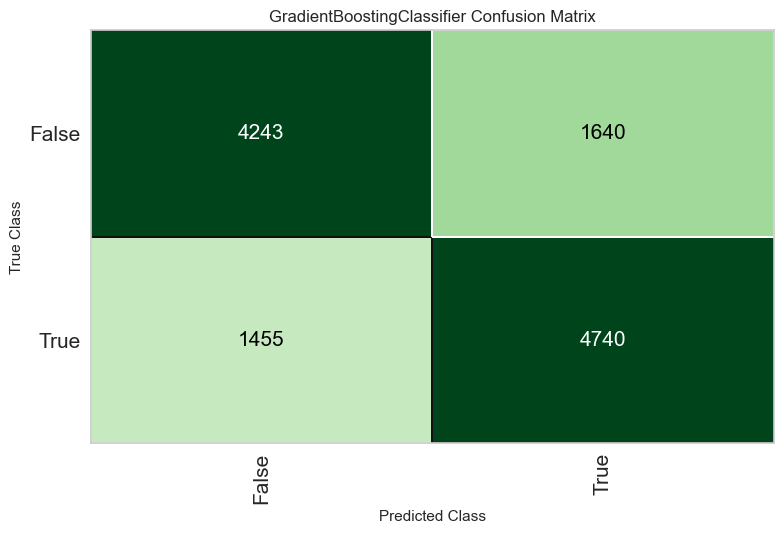

In [45]:
plot_model(final_gbc, plot='confusion_matrix')

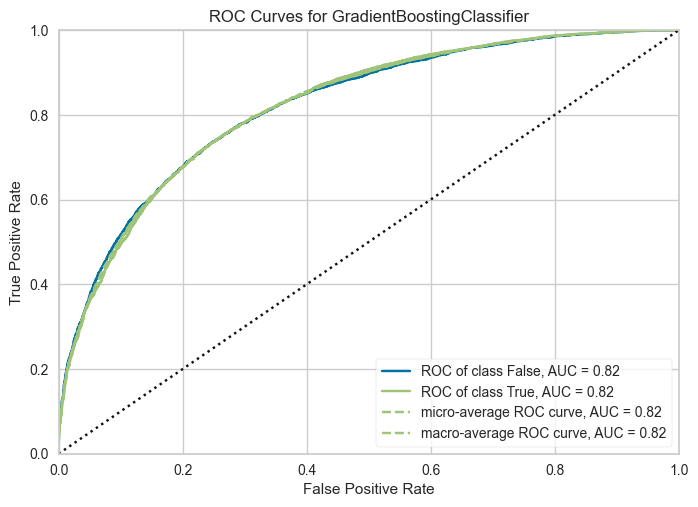

In [46]:
plot_model(final_gbc, plot='auc')

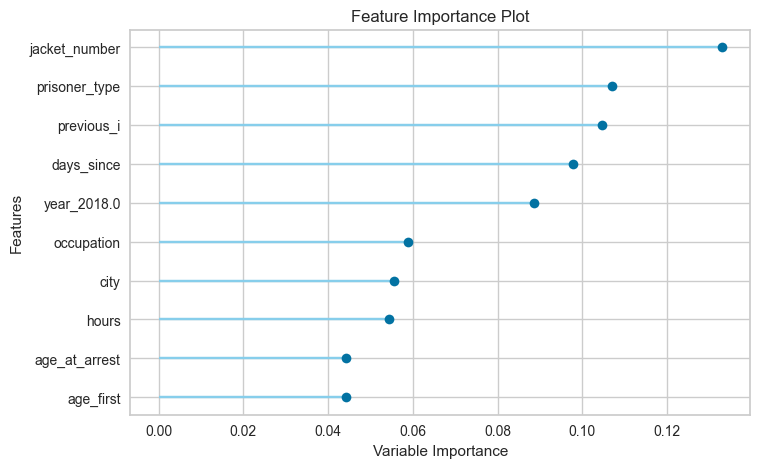

In [47]:
plot_model(final_gbc, plot='feature')

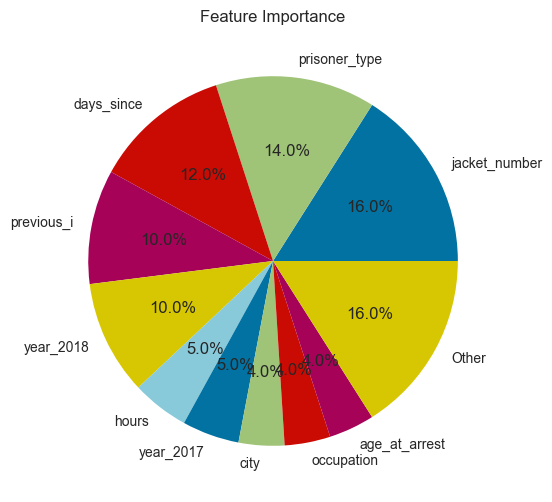

In [48]:
import matplotlib.pyplot as plt

data = {'Category': ['jacket_number', 'prisoner_type', 'days_since', 'previous_i', 'year_2018', 'hours', 'year_2017', 'city', 'occupation', 'age_at_arrest', 'Other'],
        'Values': [16, 14, 12, 10, 10, 5, 5, 4, 4, 4, 16]}
df = pd.DataFrame(data)

plt.figure(figsize=(8, 6))
plt.pie(df['Values'], labels=df['Category'], autopct='%1.1f%%')
plt.title('Feature Importance')
plt.show()

In [49]:
data = pd.read_csv("miller.csv")

predict_model(final_gbc, data)


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


,booking_date,jacket_number,age_at_arrest,age_at_release,hours,marital_status,employment_status,city,race,sex,...,prisoner_type_no,r_count,offense_level,days_since,previous_i,age_first,year,r,prediction_label,prediction_score
0,12/16/2022,9999999,23,23,24,Single,Unemployed,CHAMPAIGN,Black,Male,...,0,8,Felony,NaN,0,23,2022,False,0,0.6790
1,2/4/2023,9999999,23,23,20,Single,Unemployed,CHAMPAIGN,Black,Male,...,0,8,Felony,50.0,1,23,2023,True,1,0.6061
2,2/12/2023,9999999,23,23,21,Single,Unemployed,CHAMPAIGN,Black,Male,...,0,8,Felony,7.0,2,23,2023,True,1,0.6698
3,2/17/2023,9999999,23,23,21,Single,Unemployed,CHAMPAIGN,Black,Male,...,0,8,Felony,5.0,3,23,2023,True,1,0.6999
4,3/23/2023,9999999,23,23,1752,Single,Unemployed,CHAMPAIGN,Black,Male,...,0,8,Felony,34.0,4,23,2023,True,1,0.6184
5,9/28/2023,9999999,23,23,1752,Single,Unemployed,CHAMPAIGN,Black,Male,...,0,8,Felony,189.0,5,23,2023,True,1,0.5357
6,10/6/2023,9999999,23,23,22,Single,Unemployed,URBANA,Black,Male,...,0,8,Felony,8.0,6,23,2023,True,1,0.7645
7,10/20/2023,9999999,23,23,18,Single,Unemployed,CHAMPAIGN,Black,Male,...,0,8,Felony,14.0,7,23,2023,True,1,0.7563
8,12/2/2023,9999999,23,23,15,Single,Unemployed,CHAMPAIGN,Black,Male,...,0,8,Felony,43.0,8,23,2023,True,1,0.5875
